In [89]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,f1_score

In [90]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
##Sütun Açıklamaları (Customer Churn Analysis Data)
#
# RowNumber: Müşteri verilerindeki satır numarası (index).
# CustomerId: Müşterinin tekil tanımlayıcı numarası.
# Surname: Müşterinin soyadı.
# CreditScore: Müşterinin kredi puanı.
# Geography: Müşterinin ikamet ettiği ülke (Örn: France, Spain, Germany).
# Gender: Müşterinin cinsiyeti (Örn: Female, Male).
# Age: Müşterinin yaşı.
# Tenure: Müşterinin bankada geçirdiği yıl sayısı.
# Balance: Müşterinin hesap bakiyesi (genellikle para birimi belirtilmez, ancak varsayılan olarak yerel para birimi).
# NumOfProducts: Müşterinin bankadaki aktif ürün/hizmet sayısı.
# HasCrCard: Müşterinin kredi kartı olup olmadığı (1 = Evet, 0 = Hayır).
# IsActiveMember: Müşterinin aktif bir banka üyesi olup olmadığı (1 = Evet, 0 = Hayır).
# EstimatedSalary: Müşterinin tahmini yıllık maaşı.
# Exited: Müşterinin bankayı terk edip etmediğini (churn) gösteren hedef değişken (1 = Terk etti, 0 = Terk etmedi/Hala müşteri).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [7]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Balance'>

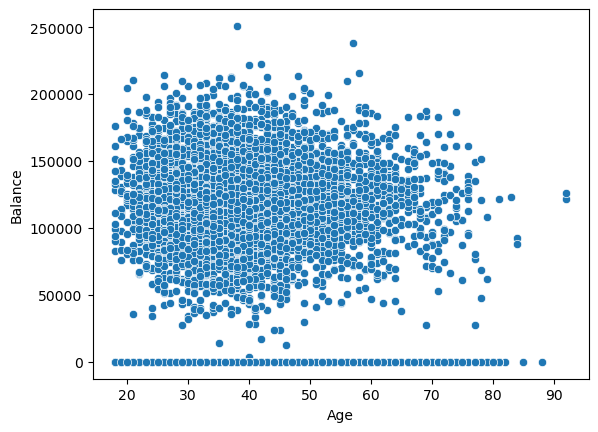

In [8]:
sns.scatterplot(x=df['Age'],y=df['Balance'])

<Axes: xlabel='Age', ylabel='Exited'>

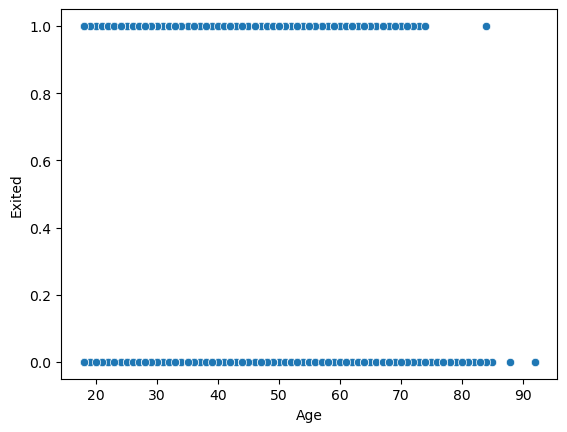

In [9]:
sns.scatterplot(x=df['Age'],y=df['Exited'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


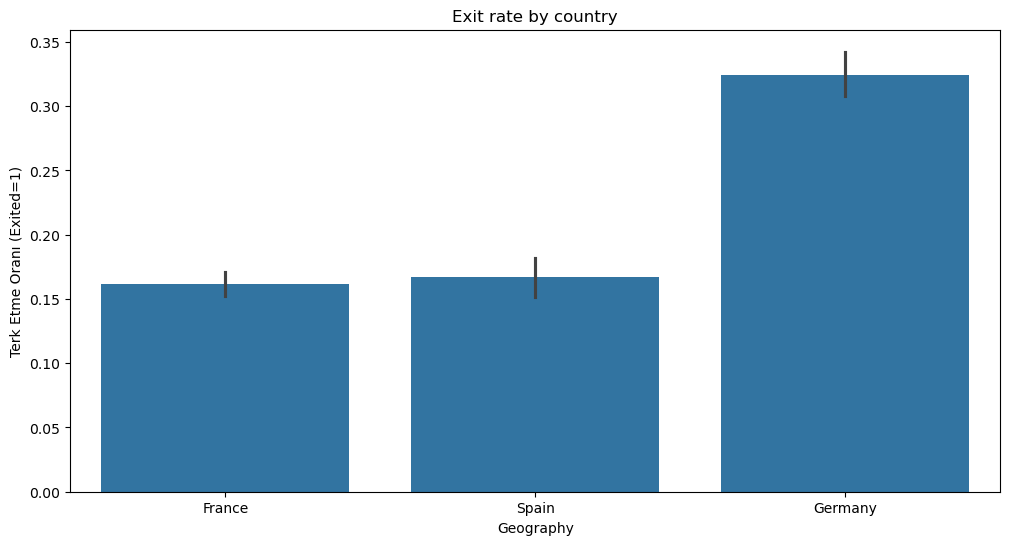

In [11]:
##Exit rate by country
plt.figure(figsize=(12, 6))
sns.barplot(x='Geography', y='Exited', data=df)
plt.title('Exit rate by country')
plt.ylabel('Terk Etme Oranı (Exited=1)')
plt.show()

Text(0.5, 1.0, 'Balance Rate by Country')

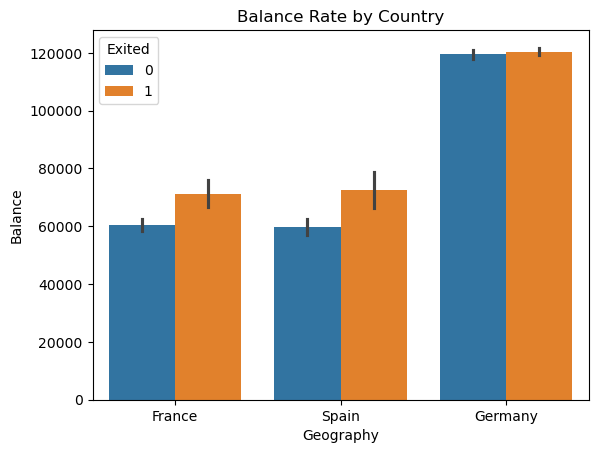

In [12]:
sns.barplot(x="Geography",y="Balance",hue="Exited",data=df)
plt.title("Balance Rate by Country")

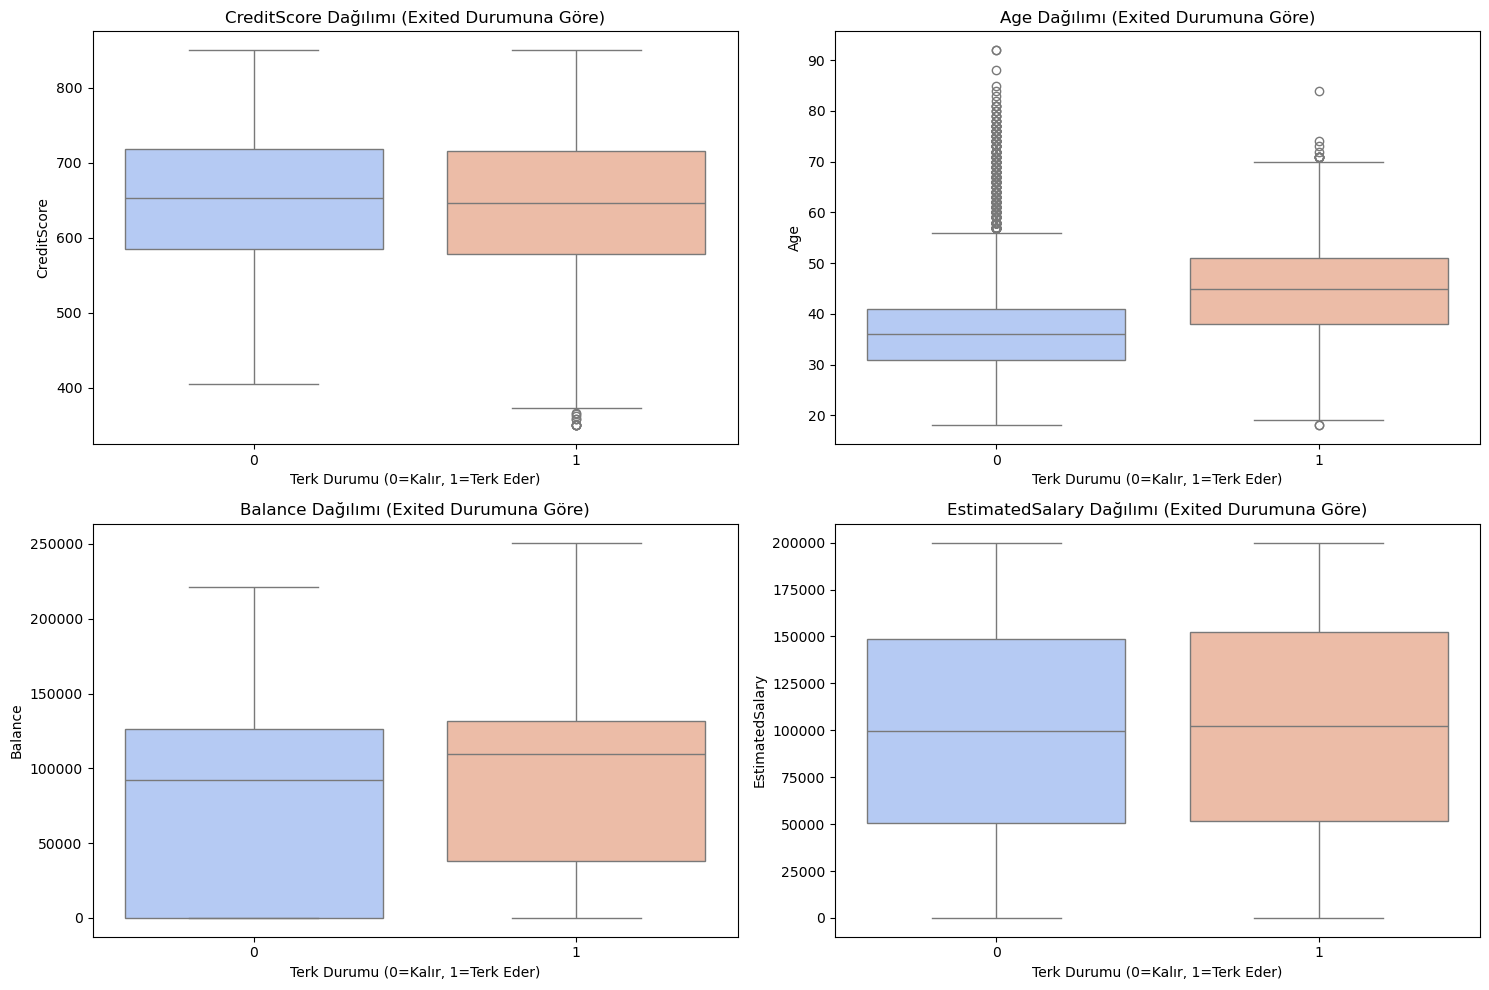

In [13]:
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Grafik döngüsü
plt.figure(figsize=(15, 10)) # Genel figür boyutunu ayarlama

for i, col in enumerate(numerical_cols):
    # Her bir sütun için alt grafik oluşturma
    plt.subplot(2, 2, i + 1)
    
    # Kutu Grafiği (Box Plot) çizimi
    # x='Exited': Gruplama değişkeni (0 ve 1)
    # y=col: Dağılımı incelenecek sayısal değişken
    sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')
    
    plt.title(f'{col} Dağılımı (Exited Durumuna Göre)')
    plt.xlabel('Terk Durumu (0=Kalır, 1=Terk Eder)')
    plt.ylabel(col)

plt.tight_layout() # Grafikler arası boşlukları düzenleme
plt.show()

#

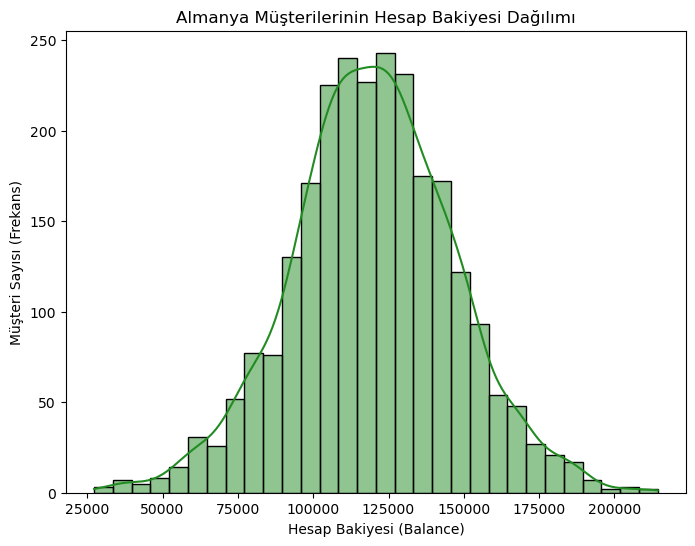

In [14]:
germany_df = df[df['Geography'] == 'Germany']

plt.figure(figsize=(8, 6))

# Histogram ve Yoğunluk (KDE) eğrisi çizimi
sns.histplot(data=germany_df, x='Balance', kde=True, bins=30, color='forestgreen')

plt.title('Almanya Müşterilerinin Hesap Bakiyesi Dağılımı')
plt.xlabel('Hesap Bakiyesi (Balance)')
plt.ylabel('Müşteri Sayısı (Frekans)')
plt.show()

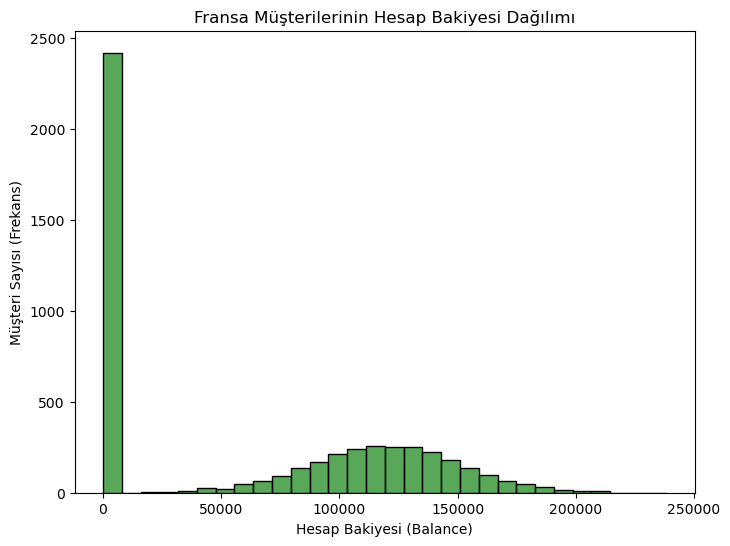

In [15]:
france_df = df[df['Geography'] == 'France']

plt.figure(figsize=(8, 6))

# Histogram ve Yoğunluk (KDE) eğrisi çizimi
sns.histplot(data=france_df, x='Balance', bins=30, color='forestgreen')

plt.title('Fransa Müşterilerinin Hesap Bakiyesi Dağılımı')
plt.xlabel('Hesap Bakiyesi (Balance)')
plt.ylabel('Müşteri Sayısı (Frekans)')
plt.show()

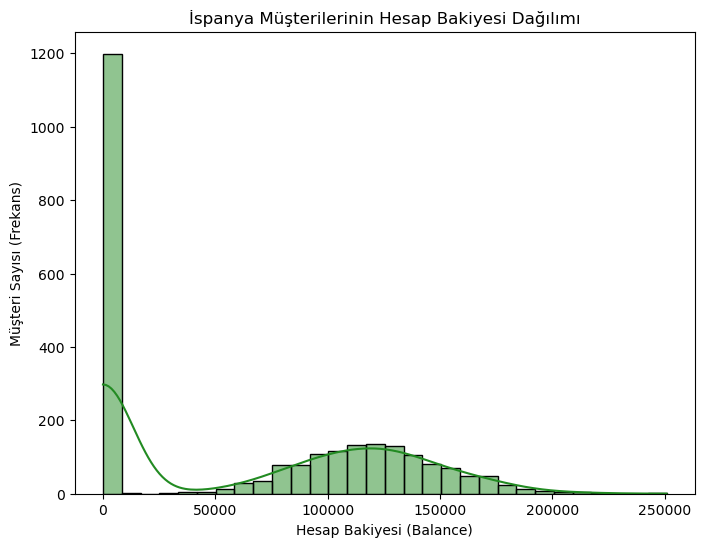

In [16]:
spain_df = df[df['Geography'] == 'Spain']

plt.figure(figsize=(8, 6))

# Histogram ve Yoğunluk (KDE) eğrisi çizimi
sns.histplot(data=spain_df, x='Balance', kde=True, bins=30, color='forestgreen')

plt.title('İspanya Müşterilerinin Hesap Bakiyesi Dağılımı')
plt.xlabel('Hesap Bakiyesi (Balance)')
plt.ylabel('Müşteri Sayısı (Frekans)')
plt.show()

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

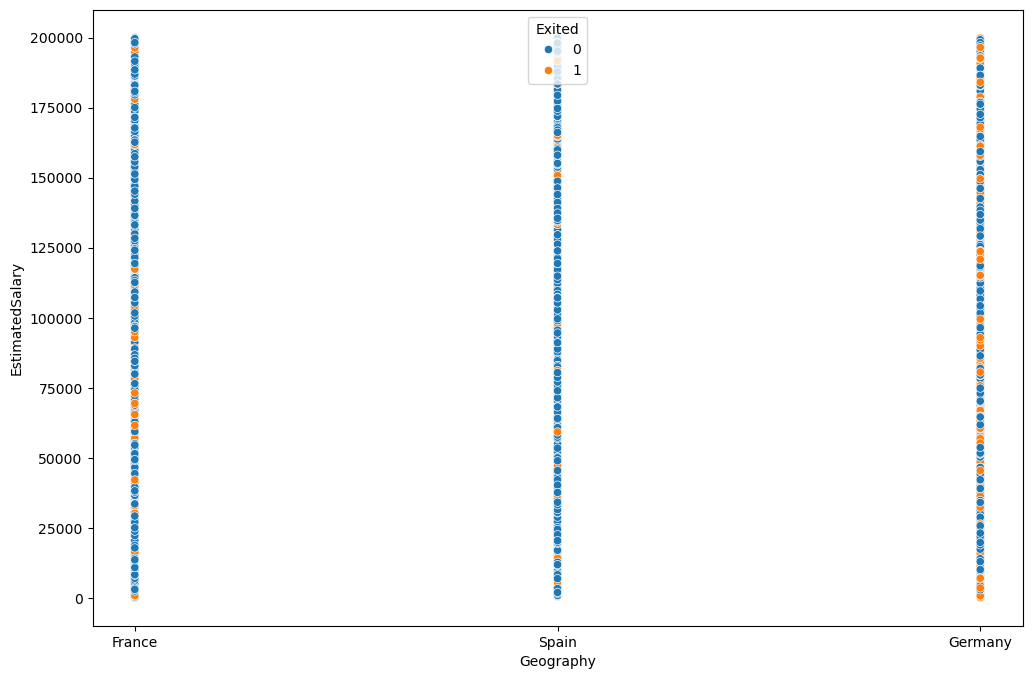

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Geography'],y=df['EstimatedSalary'],hue=df["Exited"])

In [18]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

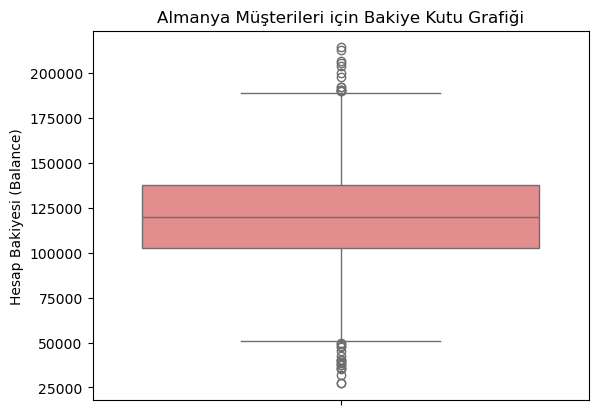

In [19]:
sns.boxplot(y=germany_df['Balance'], color='lightcoral')

plt.title('Almanya Müşterileri için Bakiye Kutu Grafiği')
plt.ylabel('Hesap Bakiyesi (Balance)')
plt.show()

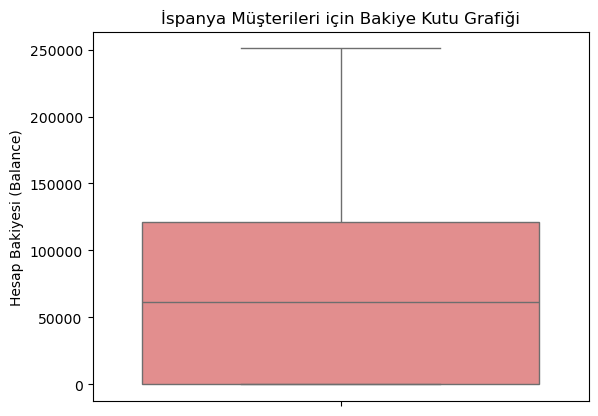

In [20]:
sns.boxplot(y=spain_df['Balance'], color='lightcoral')

plt.title('İspanya Müşterileri için Bakiye Kutu Grafiği')
plt.ylabel('Hesap Bakiyesi (Balance)')
plt.show()

In [21]:
#####

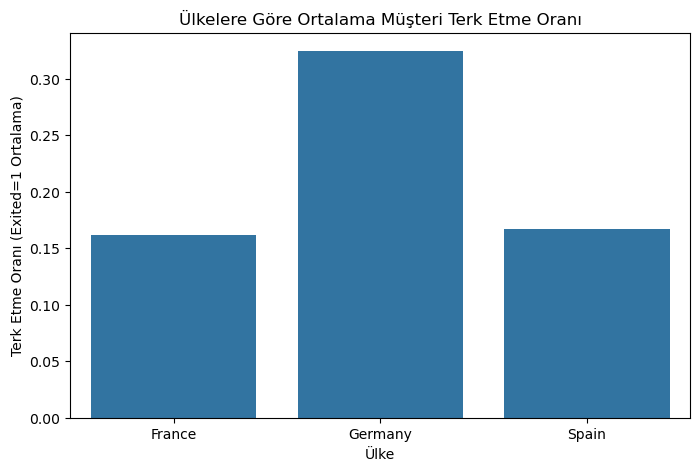

In [22]:
churn_rate_by_geo = df.groupby('Geography')['Exited'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Geography', y='Exited', data=churn_rate_by_geo) 

plt.title('Ülkelere Göre Ortalama Müşteri Terk Etme Oranı')
plt.xlabel('Ülke')
plt.ylabel('Terk Etme Oranı (Exited=1 Ortalama)')
plt.show()

In [23]:
###Train model


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [27]:
from sklearn.compose import ColumnTransformer


In [28]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4901,673,France,Male,59,0,178058.06,2,0,1,21063.71
4375,850,Germany,Male,41,8,60880.68,1,1,0,31825.84
6698,725,France,Female,31,6,0.00,1,0,0,61326.43
9805,644,France,Male,33,7,174571.36,1,0,1,43943.09
1101,703,Spain,Male,29,9,0.00,2,1,0,50679.48


In [85]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Sütun Tanımları
geography_col = ['Geography']
gender_col = ['Gender']
numerical_cols = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]

# Encoders ve Scaler
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
gender_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
scaler = StandardScaler()

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('geo_ohe', onehot, geography_col),
        ('gender_enc', gender_encoder, gender_col),
        ('num_scaler', scaler, numerical_cols)
    ],
    remainder='drop'
)

# Fit ve Transform
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [86]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.218351,1.916619,-1.731689,1.629928,0.813111,-1.539736,0.969789,-1.382844
1,0.0,1.0,0.0,1.0,2.057280,0.202109,1.041750,-0.246244,-0.911043,0.649462,-1.031152,-1.195890
2,1.0,0.0,0.0,0.0,0.758602,-0.750397,0.348390,-1.221027,-0.911043,-1.539736,-1.031152,-0.683422
3,1.0,0.0,0.0,1.0,-0.082942,-0.559895,0.695070,1.574101,-0.911043,-1.539736,0.969789,-0.985396
4,0.0,0.0,1.0,1.0,0.530034,-0.940898,1.388429,-1.221027,0.813111,0.649462,-1.031152,-0.868375
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,0.0,0.0,1.0,1.205347,1.440366,1.041750,-0.104830,-0.911043,0.649462,0.969789,-0.543502
7496,1.0,0.0,0.0,0.0,0.311856,1.821368,-1.385009,-1.221027,-0.911043,0.649462,0.969789,-1.736478
7497,1.0,0.0,0.0,0.0,0.862496,-0.083643,-1.385009,-1.221027,2.537266,-1.539736,-1.031152,-0.146754
7498,1.0,0.0,0.0,1.0,0.156015,0.392610,1.041750,1.824777,-0.911043,0.649462,-1.031152,-0.054895


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
regressor = LogisticRegression(max_iter=1000)
regressor.fit(X_train_transformed, y_train)

LogisticRegression()

In [33]:
y_pred = regressor.predict(X_test_transformed)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8072
Confusion Matrix:
 [[1920   83]
 [ 399   98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.54      0.20      0.29       497

    accuracy                           0.81      2500
   macro avg       0.68      0.58      0.59      2500
weighted avg       0.77      0.81      0.77      2500



In [35]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_transformed, y_train)
y_svm_pred = svm_classifier.predict(X_test_transformed)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_svm_pred))
print("Classification Report:\n", classification_report(y_test, y_svm_pred))

Accuracy: 0.8572
Confusion Matrix:
 [[1956   47]
 [ 310  187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2003
           1       0.80      0.38      0.51       497

    accuracy                           0.86      2500
   macro avg       0.83      0.68      0.71      2500
weighted avg       0.85      0.86      0.84      2500



In [43]:
from scipy.stats import uniform # ⬅️ BU İMPORT GEREKLİ!
param_grid = {
    'C': uniform(0.1, 10),  # Sürekli dağılım
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
}

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
rs = RandomizedSearchCV(estimator=SVC(), param_distributions=param_grid, verbose=2, cv=5, random_state=42, n_jobs=-1)
rs.fit(X_train_transformed, y_train)

In [47]:
rs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000229305D6510>,
                                        'gamma': ['scale', 'auto', 0.01, 0.1,
                                                  1],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, verbose=2)

In [48]:
rs.best_score_

np.float64(0.8560000000000001)

In [50]:
from scipy.stats import randint
dt_param_grid = {
    'max_depth': randint(3, 20),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    # 'max_features': ['auto', 'sqrt', 'log2', None], # 'auto' scikit-learn'de deprecated olabilir
}

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=dt_param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [53]:
random_search_dt.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000229305D67B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002292FD17D90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002292FD17B10>},
                   random_state=42, scoring='accuracy')

In [56]:
random_search_dt.best_score_

np.float64(0.8538666666666668)

In [61]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.218351,1.916619,-1.731689,1.629928,0.813111,-1.539736,0.969789,-1.382844
1,0.0,0.0,1.0,0.0,2.057280,0.202109,1.041750,-0.246244,-0.911043,0.649462,-1.031152,-1.195890
2,1.0,0.0,0.0,1.0,0.758602,-0.750397,0.348390,-1.221027,-0.911043,-1.539736,-1.031152,-0.683422
3,1.0,0.0,0.0,0.0,-0.082942,-0.559895,0.695070,1.574101,-0.911043,-1.539736,0.969789,-0.985396
4,0.0,1.0,0.0,0.0,0.530034,-0.940898,1.388429,-1.221027,0.813111,0.649462,-1.031152,-0.868375
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,0.0,0.0,0.0,1.205347,1.440366,1.041750,-0.104830,-0.911043,0.649462,0.969789,-0.543502
7496,1.0,0.0,0.0,1.0,0.311856,1.821368,-1.385009,-1.221027,-0.911043,0.649462,0.969789,-1.736478
7497,1.0,0.0,0.0,1.0,0.862496,-0.083643,-1.385009,-1.221027,2.537266,-1.539736,-1.031152,-0.146754
7498,1.0,0.0,0.0,0.0,0.156015,0.392610,1.041750,1.824777,-0.911043,0.649462,-1.031152,-0.054895


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [64]:
rf_model.fit(X_train_transformed, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred_rf = rf_model.predict(X_test_transformed)

In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print()

Accuracy: 0.8684


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rff_model = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
}

In [92]:
random_search_rf = RandomizedSearchCV(
    estimator=rff_model,
    param_distributions=param_grid_rf,
    n_iter=50, 
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)
random_search_rf.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='f1')

In [94]:
random_search_rf.best_score_

np.float64(0.5838146857795017)

In [98]:
# Model Sonuçları Özeti
print("="*50)
print("MODEL PERFORMANS KARŞILAŞTIRMASI")
print("="*50)

# Logistic Regression
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"\n1. Logistic Regression Accuracy: {lr_accuracy:.4f}")

# SVM
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print(f"2. SVM Accuracy: {svm_accuracy:.4f}")

# Decision Tree
dt_best_pred = random_search_rf.predict(X_test_transformed)
dt_accuracy = accuracy_score(y_test, dt_best_pred)
print(f"3. Decision Tree Accuracy (Tuned): {dt_accuracy:.4f}")

# Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"4. Random Forest Accuracy: {rf_accuracy:.4f}")



MODEL PERFORMANS KARŞILAŞTIRMASI

1. Logistic Regression Accuracy: 0.8072
2. SVM Accuracy: 0.8572
3. Decision Tree Accuracy (Tuned): 0.8668
4. Random Forest Accuracy: 0.8684
